In [1]:
import anndata as ad
import networkx as nx
import scanpy as sc
import os
print(os.getcwd())
path=os.getcwd()

/Users/meiqiliu/PycharmProjects/GLUE3/evaluation/workflow/scripts


In [2]:
os.chdir("/Users/meiqiliu/PycharmProjects/GLUE3/")

In [3]:
from scglue import *
from itertools import chain

In [4]:
rna = ad.read_h5ad(path+"/rna-pp-seq.h5ad")
atac = ad.read_h5ad(path+"/atac-pp-seq.h5ad")
guidance = nx.read_graphml(path+"/guidance-seq.graphml.gz")
# rna = ad.read_h5ad("rna-pp2.h5ad")
# atac = ad.read_h5ad("atac-pp2.h5ad")
# guidance = nx.read_graphml("guidance2.graphml.gz")
models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

models.configure_dataset(
    atac, "NB", use_highly_variable=True,
    use_rep="X_lsi"
)
guidance_hvf = guidance.subgraph(chain(
    rna.var.query("highly_variable").index,
    atac.var.query("highly_variable").index
)).copy()

glue = models.fit_SCGLUE(
    {"rna": rna, "atac": atac}, guidance_hvf,
    fit_kws={"directory": "glue"}
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
encoder constructed
NB
encoder constructed
NB
[INFO] autodevice: Using CPU as computation device.
pretrain.fit---------------------
-------SCGlUEModel.fit------------
obsm AxisArrays with keys: X_pca, X_umap
rna data extract data (1000, 800)
obsm AxisArrays with keys: X_lsi
original atac before conversion AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'domain', 'cell_type'
    var: 'chrom', 'chromStart', 'chromEnd', 'highly_variable'
    uns: '__scglue__'
    obsm: 'X_lsi'
/var/folders/12/d54y_pk95zdbftjg_qkcj_c80000gq/T/tmp0khr9zjd
genome mm10 True
/Users/meiqiliu/PycharmProjects/GLUE3/experiments/Atlas/scripts/mm10.fa
True /Users/meiqiliu/PycharmProjects/GLUE3/experiments/Atlas/scripts/mm10.fa
running bedtools...
bedtools getfasta -fi /Users/meiqiliu/PycharmProjects/GLUE3/experiments/Atlas/scripts/mm10.fa -bed /var/folders/12/d54y_pk95zdbftjg_qkcj_c80000gq/T/tmp0khr9zjd -fo /var/folders/12/d54y_pk95zdbftjg_qkcj_c80000gq/T/tmpv

[INFO] SCGLUETrainer: [Epoch 140] train={'g_nll': 0.143, 'g_kl': 0.193, 'g_elbo': 0.336, 'x_rna_nll': 0.207, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.215, 'x_atac_nll': 0.043, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.047, 'dsc_loss': 0.639, 'vae_loss': 0.276, 'gen_loss': 0.244}, val={'g_nll': 0.166, 'g_kl': 0.193, 'g_elbo': 0.359, 'x_rna_nll': 0.209, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.217, 'x_atac_nll': 0.047, 'x_atac_kl': 0.025, 'x_atac_elbo': 0.072, 'dsc_loss': 1.064, 'vae_loss': 0.303, 'gen_loss': 0.25}, 3.7s elapsed
[INFO] SCGLUETrainer: [Epoch 150] train={'g_nll': 0.144, 'g_kl': 0.19, 'g_elbo': 0.334, 'x_rna_nll': 0.206, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.215, 'x_atac_nll': 0.043, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.047, 'dsc_loss': 0.617, 'vae_loss': 0.274, 'gen_loss': 0.244}, val={'g_nll': 0.142, 'g_kl': 0.191, 'g_elbo': 0.333, 'x_rna_nll': 0.205, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.212, 'x_atac_nll': 0.046, 'x_atac_kl': 0.003, 'x_atac_elbo': 0.05, 'dsc_loss': 0.662, 'vae_loss': 0.275, 'g

[INFO] SCGLUETrainer: [Epoch 300] train={'g_nll': 0.14, 'g_kl': 0.12, 'g_elbo': 0.261, 'x_rna_nll': 0.207, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.215, 'x_atac_nll': 0.044, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.044, 'dsc_loss': 0.645, 'vae_loss': 0.269, 'gen_loss': 0.236}, val={'g_nll': 0.15, 'g_kl': 0.12, 'g_elbo': 0.27, 'x_rna_nll': 0.205, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.213, 'x_atac_nll': 0.047, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.047, 'dsc_loss': 0.646, 'vae_loss': 0.27, 'gen_loss': 0.238}, 3.8s elapsed
[INFO] SCGLUETrainer: [Epoch 310] train={'g_nll': 0.142, 'g_kl': 0.12, 'g_elbo': 0.261, 'x_rna_nll': 0.206, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.213, 'x_atac_nll': 0.041, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.041, 'dsc_loss': 0.642, 'vae_loss': 0.265, 'gen_loss': 0.233}, val={'g_nll': 0.152, 'g_kl': 0.12, 'g_elbo': 0.272, 'x_rna_nll': 0.205, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.212, 'x_atac_nll': 0.044, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.044, 'dsc_loss': 0.649, 'vae_loss': 0.267, 'gen_loss': 0.2

[INFO] SCGLUETrainer: [Epoch 460] train={'g_nll': 0.122, 'g_kl': 0.116, 'g_elbo': 0.238, 'x_rna_nll': 0.206, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.214, 'x_atac_nll': 0.041, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.041, 'dsc_loss': 0.644, 'vae_loss': 0.265, 'gen_loss': 0.233}, val={'g_nll': 0.133, 'g_kl': 0.116, 'g_elbo': 0.249, 'x_rna_nll': 0.215, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.223, 'x_atac_nll': 0.047, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.047, 'dsc_loss': 0.641, 'vae_loss': 0.28, 'gen_loss': 0.248}, 3.6s elapsed
[INFO] SCGLUETrainer: [Epoch 470] train={'g_nll': 0.147, 'g_kl': 0.116, 'g_elbo': 0.262, 'x_rna_nll': 0.205, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.213, 'x_atac_nll': 0.042, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.042, 'dsc_loss': 0.647, 'vae_loss': 0.266, 'gen_loss': 0.233}, val={'g_nll': 0.155, 'g_kl': 0.116, 'g_elbo': 0.271, 'x_rna_nll': 0.205, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.213, 'x_atac_nll': 0.048, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.048, 'dsc_loss': 0.659, 'vae_loss': 0.272, 'gen_los

2023-10-08 23:57:40,529 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "382"...
[INFO] EarlyStopping: Restoring checkpoint "382"...
[INFO] fit_SCGLUE: Estimating balancing weight...
pretrain.encode_data
encode_data
test [100000]
dataset <scglue.models.data.AnnDataset object at 0x2ab5664c0>
dataloader <scglue.models.data.DataLoader object at 0x2ac476bb0>
x tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) <built-in method size of Tensor object at 0x2ac968450>
xrep tensor([[ 3.4848e+00,  1.1419e+01,  9.0474e+00,  ..., -5.3637e+00,
          1.6020e-01, -1.2030e+00],
        [ 1.9448e-01, -4.5760e-01,  1.2121e+00,  ...,  7.5708e-02,
         -1.0075e-02, -4.6372e-02],
        [-1.4876e+00, -2.0016e+00,  1.0567e+00,  ..., -2.0453e-01,
          2.3667e-01, -3.0250e-01],
        ...,
        [-1.8596e+00, -1.6021e+00,

convert sequence (1000, 4, 1000)
atac data (1000, 4, 1000)
dataset <scglue.models.data.AnnDataset object at 0x2ac4762b0>
dataloader <scglue.models.data.DataLoader object at 0x2a7fe9070>
x tensor([[[0.2500, 0.2500, 0.2500,  ..., 1.0000, 1.0000, 1.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.2500, 0.2500, 0.2500,  ..., 0.0000, 1.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 1.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 1.0000]],

        [[0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 1.0000],
         [0.2500, 0.2500, 0.2500,  ..., 1.0000, 1.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000]],

        ...,

        [[0.

[INFO] estimate_balancing_weight: Clustering cells...


RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (17, 14)...
[INFO] estimate_balancing_weight: Estimating balancing weight...
balancing [0.         0.         0.         0.         0.         0.00967566
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00871531 0.
 0.         0.         0.00871531 0.         0.01506061 0.
 0.         0.         0.         0.         0.         0.01506061
 0.         0.00967566 0.         0.         0.         0.01506061
 0.         0.         0.         0.00871531 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01506061
 0

encoder constructed
NB
encoder constructed
NB
-------SCGlUEModel.fit------------
obsm AxisArrays with keys: X_pca, X_umap
rna data extract data (1000, 800)
obsm AxisArrays with keys: X_lsi
original atac before conversion AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'domain', 'cell_type', 'balancing_weight'
    var: 'chrom', 'chromStart', 'chromEnd', 'highly_variable'
    uns: '__scglue__'
    obsm: 'X_lsi'
/var/folders/12/d54y_pk95zdbftjg_qkcj_c80000gq/T/tmpy_pa78cl
genome mm10 True
/Users/meiqiliu/PycharmProjects/GLUE3/experiments/Atlas/scripts/mm10.fa
True /Users/meiqiliu/PycharmProjects/GLUE3/experiments/Atlas/scripts/mm10.fa
running bedtools...
bedtools getfasta -fi /Users/meiqiliu/PycharmProjects/GLUE3/experiments/Atlas/scripts/mm10.fa -bed /var/folders/12/d54y_pk95zdbftjg_qkcj_c80000gq/T/tmpy_pa78cl -fo /var/folders/12/d54y_pk95zdbftjg_qkcj_c80000gq/T/tmpl3tgyecr
length of seq2: 1000
convert sequence (1000, 4, 1000)
atac data (1000, 4, 1000)
[INFO] check_graph: Check

[INFO] SCGLUETrainer: [Epoch 150] train={'g_nll': 0.138, 'g_kl': 0.085, 'g_elbo': 0.222, 'x_rna_nll': 0.201, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.207, 'x_atac_nll': 0.042, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.043, 'dsc_loss': 0.675, 'vae_loss': 0.259, 'gen_loss': 0.225}, val={'g_nll': 0.119, 'g_kl': 0.084, 'g_elbo': 0.204, 'x_rna_nll': 0.212, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.218, 'x_atac_nll': 0.039, 'x_atac_kl': 0.239, 'x_atac_elbo': 0.278, 'dsc_loss': 3.569, 'vae_loss': 0.505, 'gen_loss': 0.326}, 3.3s elapsed
[INFO] SCGLUETrainer: [Epoch 160] train={'g_nll': 0.141, 'g_kl': 0.083, 'g_elbo': 0.224, 'x_rna_nll': 0.201, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.207, 'x_atac_nll': 0.042, 'x_atac_kl': 0.001, 'x_atac_elbo': 0.043, 'dsc_loss': 0.658, 'vae_loss': 0.26, 'gen_loss': 0.227}, val={'g_nll': 0.14, 'g_kl': 0.083, 'g_elbo': 0.223, 'x_rna_nll': 0.213, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.219, 'x_atac_nll': 0.038, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.042, 'dsc_loss': 1.019, 'vae_loss': 0.27, 'g

[INFO] SCGLUETrainer: [Epoch 310] train={'g_nll': 0.141, 'g_kl': 0.077, 'g_elbo': 0.217, 'x_rna_nll': 0.202, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.208, 'x_atac_nll': 0.045, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.047, 'dsc_loss': 0.661, 'vae_loss': 0.264, 'gen_loss': 0.231}, val={'g_nll': 0.148, 'g_kl': 0.077, 'g_elbo': 0.225, 'x_rna_nll': 0.213, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.218, 'x_atac_nll': 0.04, 'x_atac_kl': 0.003, 'x_atac_elbo': 0.043, 'dsc_loss': 0.889, 'vae_loss': 0.27, 'gen_loss': 0.226}, 3.2s elapsed
[INFO] SCGLUETrainer: [Epoch 320] train={'g_nll': 0.149, 'g_kl': 0.077, 'g_elbo': 0.226, 'x_rna_nll': 0.201, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.206, 'x_atac_nll': 0.042, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.043, 'dsc_loss': 0.698, 'vae_loss': 0.259, 'gen_loss': 0.224}, val={'g_nll': 0.137, 'g_kl': 0.077, 'g_elbo': 0.214, 'x_rna_nll': 0.21, 'x_rna_kl': 0.005, 'x_rna_elbo': 0.216, 'x_atac_nll': 0.049, 'x_atac_kl': 0.005, 'x_atac_elbo': 0.054, 'dsc_loss': 0.885, 'vae_loss': 0.279, 'g

[INFO] SCGLUETrainer: [Epoch 470] train={'g_nll': 0.139, 'g_kl': 0.075, 'g_elbo': 0.213, 'x_rna_nll': 0.199, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.205, 'x_atac_nll': 0.042, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.042, 'dsc_loss': 0.665, 'vae_loss': 0.255, 'gen_loss': 0.222}, val={'g_nll': 0.128, 'g_kl': 0.075, 'g_elbo': 0.203, 'x_rna_nll': 0.198, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.204, 'x_atac_nll': 0.045, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.045, 'dsc_loss': 0.85, 'vae_loss': 0.258, 'gen_loss': 0.215}, 3.2s elapsed
[INFO] SCGLUETrainer: [Epoch 480] train={'g_nll': 0.134, 'g_kl': 0.074, 'g_elbo': 0.208, 'x_rna_nll': 0.199, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.205, 'x_atac_nll': 0.042, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.042, 'dsc_loss': 0.68, 'vae_loss': 0.256, 'gen_loss': 0.222}, val={'g_nll': 0.151, 'g_kl': 0.074, 'g_elbo': 0.225, 'x_rna_nll': 0.215, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.221, 'x_atac_nll': 0.046, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.046, 'dsc_loss': 0.834, 'vae_loss': 0.276, 'gen_loss

2023-10-09 03:55:11,644 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "516"...
[INFO] EarlyStopping: Restoring checkpoint "516"...


In [5]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)

encode_data
test [100000]
dataset <scglue.models.data.AnnDataset object at 0x294326fa0>
dataloader <scglue.models.data.DataLoader object at 0x2ab6109a0>
x tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) <built-in method size of Tensor object at 0x2ad151590>
xrep tensor([[ 3.4848e+00,  1.1419e+01,  9.0474e+00,  ..., -5.3637e+00,
          1.6020e-01, -1.2030e+00],
        [ 1.9448e-01, -4.5760e-01,  1.2121e+00,  ...,  7.5708e-02,
         -1.0075e-02, -4.6372e-02],
        [-1.4876e+00, -2.0016e+00,  1.0567e+00,  ..., -2.0453e-01,
          2.3667e-01, -3.0250e-01],
        ...,
        [-1.8596e+00, -1.6021e+00,  7.4495e-02,  ...,  1.5668e-01,
          7.0951e-01,  2.2482e-01],
        [ 4.1313e-02,  6.0275e+00, -8.8975e+00,  ...,  2.0964e-01,
          9.8265e-01,  1.3716e-01],
   

convert sequence (1000, 4, 1000)
atac data (1000, 4, 1000)
dataset <scglue.models.data.AnnDataset object at 0x2abfdbc40>
dataloader <scglue.models.data.DataLoader object at 0x294326dc0>
x tensor([[[0.2500, 0.2500, 0.2500,  ..., 1.0000, 1.0000, 1.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.2500, 0.2500, 0.2500,  ..., 0.0000, 1.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 1.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 1.0000]],

        [[0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 1.0000],
         [0.2500, 0.2500, 0.2500,  ..., 1.0000, 1.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000]],

        ...,

        [[0.

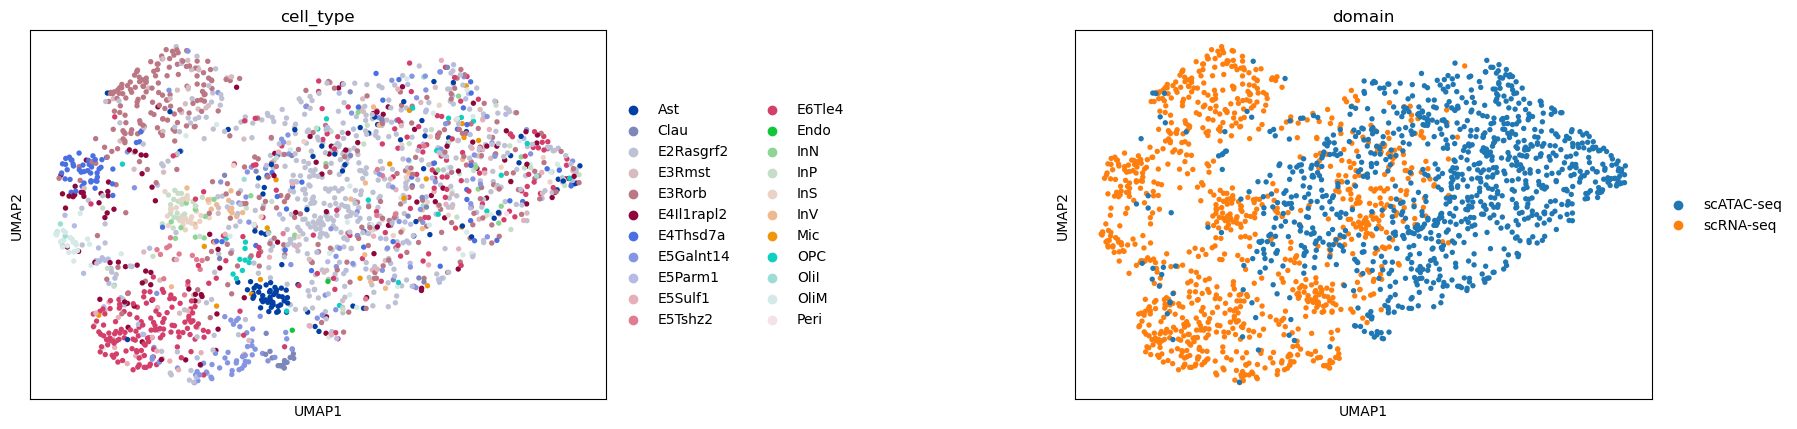

In [6]:
combined = ad.concat([rna, atac])
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")#need embedding here 
sc.tl.umap(combined)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65)